In [168]:
import scipy
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import sympy
from sympy.abc import x

In [169]:
# y'' + (2/t)y' - y + y^3 = 0

In [170]:
methods = ['RK23', 'RK45', 'Radau', 'BDF', 'LSODA']

In [610]:
coeffs = [1.0 * x, 0.0]
# t = sy
def get_coeff(k):
    cubed_val = 0
    for i in range(k-2+1):
        for j in range(k-2 - i+1):
            l = k-2 - i - j
            s = coeffs[i] * coeffs[j] * coeffs[l]
            cubed_val += s
    c = (coeffs[k-2] - cubed_val) / (k*(k+1))
    c = sympy.expand(c)
    return c
for k in range(2,30):
#     print(k)
    coeffs.append(get_coeff(k))

In [611]:
def eval_initial_cond(b, t):
    y = 0
    yd = 0
    for k in range(0, len(coeffs), 2):
        sv = coeffs[k].subs(x, b)
        y += sv * t**k
        if k > 0:
            yd += k * sv * t**(k-1)
    return y, yd

In [303]:
def my_ode(t,y): 
    a = y[0]
    b = y[1]
    return [b, -2*b/t + a - a**3]
def at_bottom(t,y): return (y[0] - 1)
def at_bottom2(t,y): return (y[0] + 1)

In [684]:
t_min = 0.01
def calc_sol(b, T, dense=False, rt=1e-4, at = 1e-6):
    y, yd = eval_initial_cond(b, t_min)
    sol = solve_ivp(my_ode, [t_min, T], [y, yd], dense_output = dense, rtol=rt, atol = at)
    return sol.y[0]

def calc_event(b, T, func, n = 0, rt=1e-5, at=1e-7):
    y, yd = eval_initial_cond(b, t_min)

    sol = solve_ivp(my_ode, [t_min, T], [y, yd], events = func, dense_output = True, rtol=1e-5, atol=1e-7)
    if len(sol.t_events[0]) <= n:
        return None
    te = sol.t_events[0][n]
    vel = sol.sol(te)[1]
    return te, vel

def calc_sol_nomin(b, T):
    t0 = 0.000001
    sol = solve_ivp(my_ode, [t0, T], [b, 0])
    return sol.y[0]

Poly(0.0, x, domain='RR')

In [756]:
T = 50
l = 3
u = 6
# f_l = calc_sol(l, T)[-1]
# f_u = calc_sol(u, T)[-1]
i = 0
m = 0
while u - l > 1e-10:
    m = (l + u)/2
    v = calc_sol(m, T, rt=1e-10, at=1e-10)[-1]
    print(i, m, v)
    if v < 0: # m > b_0
        u = m
    else: # m < b_0
        l = m
    i += 1

0 4.5 -0.9522090630173737
1 3.75 1.0139310412400244
2 4.125 0.9571046291277961
3 4.3125 1.0607926537607066
4 4.40625 -1.0015186533366447
5 4.359375 -1.0543358665362768
6 4.3359375 1.0627877332125066
7 4.34765625 -0.9609969176603727
8 4.341796875 -0.911458940616939
9 4.3388671875 -1.0597053836611987
10 4.33740234375 -1.0970972077613574
11 4.336669921875 1.0944864758130026
12 4.3370361328125 0.9764243230192371
13 4.33721923828125 0.8666927012694193
14 4.337310791015625 0.9210439002204192
15 4.3373565673828125 1.1147680324951663
16 4.337379455566406 0.9525776755813635
17 4.337390899658203 -0.8112481341086633
18 4.337385177612305 0.8260690717797964
19 4.337388038635254 -1.1487836187172904
20 4.337386608123779 1.0243621362444053
21 4.337387323379517 1.1477120856652812
22 4.337387681007385 -0.6954353887059526
23 4.337387502193451 0.9441976805798816
24 4.337387591600418 0.7744913982267091
25 4.337387636303902 0.7923075698324469
26 4.3373876586556435 1.0021329619925925
27 4.337387669831514 1.2

In [788]:
T = 50
l = 10
u = 15
# f_l = calc_sol(l, T)[-1]
# f_u = calc_sol(u, T)[-1]
i = 0
m = 0
while u - l > 1e-10:
    m = (l + u)/2
    v = calc_sol(m, T, rt=1e-10, at=1e-10)[-1]
    print(i, m, v)
    if v > 0: # m > b_0
        u = m
    else: # m < b_0
        l = m
    i += 1

0 12.5 -0.9679952387066577
1 13.75 -1.0068504892876022
2 14.375 1.0227582446161245
3 14.0625 -0.9337522630895821
4 14.21875 1.0587726177308658
5 14.140625 0.9253006318530346
6 14.1015625 -1.0064013443963757
7 14.12109375 0.9266769507184324
8 14.111328125 1.0515775864747563
9 14.1064453125 1.0695433838617041
10 14.10400390625 0.9048115862249679
11 14.102783203125 -0.8644609565979802
12 14.1033935546875 -1.0768000899758017
13 14.10369873046875 1.1397623108404926
14 14.103546142578125 -0.9352281874337394
15 14.103622436523438 0.9336530429861655
16 14.103584289550781 -0.9653439988948652
17 14.10360336303711 0.815190105616107
18 14.103593826293945 0.870049923322871
19 14.103589057922363 1.0647836815327785
20 14.103586673736572 1.1754995876857197
21 14.103585481643677 1.0092864416946068
22 14.103584885597229 0.7867142426757707
23 14.103584587574005 0.830682020059589
24 14.103584438562393 1.172962878489881
25 14.103584364056587 -1.212662443972364
26 14.10358440130949 -0.6950966951553654
27 14

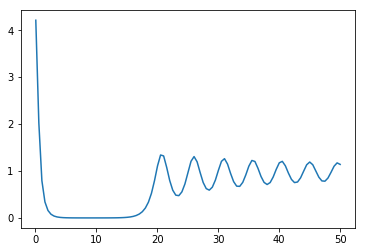

In [850]:
b = 4.337387
t = np.linspace(0.1, 50, 101)
y, yd = eval_initial_cond(b, t_min)
sol = solve_ivp(my_ode, [t_min, T], [y, yd], t_eval = t, rtol=1e-8, atol=1e-10)
plt.plot(t, sol.y[0])

In [613]:
eval_initial_cond(4.337387, 0.1)

(4.21209130551794, -2.43830808255468)

In [859]:
all_t = []
all_v = []
s = 0.5
def at_0(t,y): return y[0]
for b in np.arange(1, 16, s):
    res = calc_event(b, 50, at_bottom2, n=1)
    if res == None:
        continue
    else:
        t, v = res
    all_t.append(t)
    all_v.append(v)

In [860]:
calc_event(6.23, 50, at_bottom2, n=1)

(4.928765113170995, 0.2514186628768452)

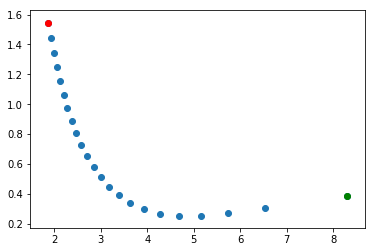

In [861]:
plt.scatter(all_t, all_v)
plt.scatter(all_t[0], all_v[0], color='green')
plt.scatter(all_t[-1], all_v[-1], color='red')

In [538]:
all_t = []
all_v = []
s = 1
n = 1
T = 50
def is_still(t,y): return y[1]
for b in np.arange(15, 100, s):
    y, yd = eval_initial_cond(b, t_min)

    sol = solve_ivp(my_ode, [t_min, T], [y, yd], events = is_still, dense_output = True)
    if len(sol.t_events[0]) <= n:
        continue
    te = sol.t_events[0][n]
    yv = sol.sol(te)[0]
    vel = sol.sol(te)[1]

    all_t.append(te)
    all_v.append(yv)


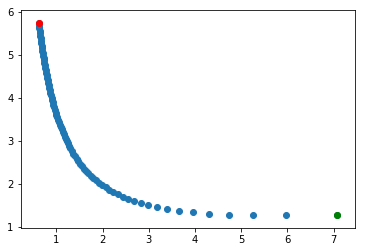

In [539]:
plt.scatter(all_t, all_v)
plt.scatter(all_t[0], all_v[0], color='green')
plt.scatter(all_t[-1], all_v[-1], color='red')

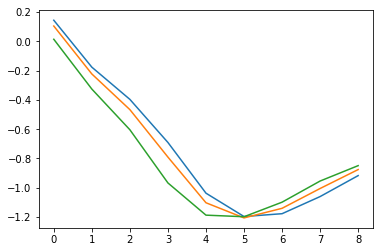

In [480]:
s = calc_sol(6.0, 50)
plt.plot(s[7:16])
s = calc_sol(6.22, 50)
plt.plot(s[7:16])
s = calc_sol(6.5, 50)
plt.plot(s[7:16])

In [247]:
s[-1]

-0.9563335671150042

In [662]:
def V(y):
    return y**4/4 - y**2/2

def energy(y):
    return y[1]**2/2 + V(y[0])

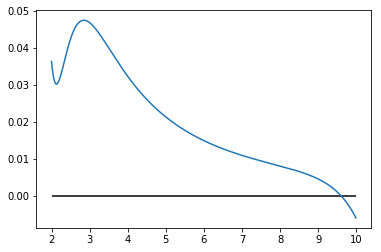

In [791]:
T = 20
t = np.arange(2, 10, 0.01)
ep = 0.0001
b = 14.103584406766458
y, yd = eval_initial_cond(b, t_min)
sol = solve_ivp(my_ode, [t_min, T], [y, yd], t_eval = t, rtol=1e-8, atol = 1e-8)
es1 = [energy([sol.y[0][i], sol.y[1][i]]) for i in range(len(sol.y[0]))]
# plt.plot(t, es)

b2 = b + ep
y, yd = eval_initial_cond(b2, t_min)
sol = solve_ivp(my_ode, [t_min, T], [y, yd], t_eval = t, rtol=1e-8, atol = 1e-8)
es2 = [energy([sol.y[0][i], sol.y[1][i]]) for i in range(len(sol.y[0]))]
# plt.plot(t, es)
ed = np.array(es2) - np.array(es1)
ed /= ep
plt.plot(t, ed)
plt.hlines(0, t[0], t[-1])
# plt.vlines(4.757048104249311, 0, 0.01)
plt.show()

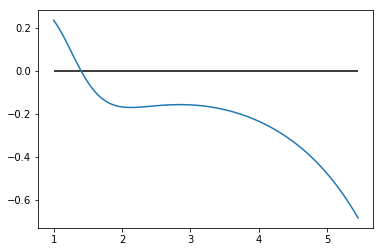

In [827]:
T = 50
b = 14.103584406766458
t = np.arange(1,5.5, 0.05)
ep = 0.001
y, yd = eval_initial_cond(b, t_min)
sol1 = solve_ivp(my_ode, [t_min, T], [y, yd], t_eval = t, rtol=1e-8, atol = 1e-8)
es = [energy([sol.y[0][i], sol.y[1][i]]) for i in range(len(sol.y[0]))]


b2 = b + ep
y, yd = eval_initial_cond(b2, t_min)
sol2 = solve_ivp(my_ode, [t_min, T], [y, yd], t_eval = t, rtol=1e-8, atol = 1e-8)
es2 = [energy([sol.y[0][i], sol.y[1][i]]) for i in range(len(sol.y[0]))]
diff = (sol1.y[0] - sol2.y[0]) / ep

# plt.plot(t, sol1.y[0])
# plt.plot(t, sol2.y[0])
plt.plot(t, diff)
# plt.vlines(4.757048104249311, -1, 1)
plt.hlines(0, t[0], t[-1])
plt.show()

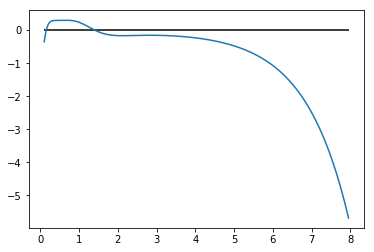

In [842]:
T = 50
b = 14.103584406766458
t = np.arange(0.1,8, 0.05)
ep = 0.0001
y, yd = eval_initial_cond(b, t_min)
sol1 = solve_ivp(my_ode, [t_min, T], [y, yd], t_eval = t, rtol=1e-8, atol = 1e-8)
es = [energy([sol.y[0][i], sol.y[1][i]]) for i in range(len(sol.y[0]))]


b2 = b + ep
y, yd = eval_initial_cond(b2, t_min)
sol2 = solve_ivp(my_ode, [t_min, T], [y, yd], t_eval = t, rtol=1e-8, atol = 1e-8)
es2 = [energy([sol.y[0][i], sol.y[1][i]]) for i in range(len(sol.y[0]))]
diff = (sol1.y[0] - sol2.y[0]) / ep

# plt.plot(t, sol1.y[0])
# plt.plot(t, sol2.y[0])
plt.plot(t, diff)
# plt.vlines(4.757048104249311, -1, 1)
plt.hlines(0, t[0], t[-1])
plt.show()

In [685]:
calc_event(4.34, 60, at_0, n=0)

(4.757048104249311, -0.009792162763793768)

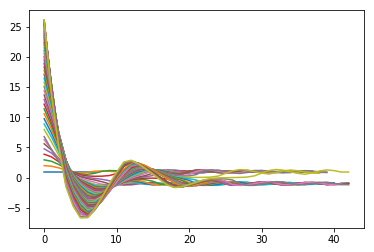

In [367]:
T = 20
initials = np.arange(1, 50, 1)
my_sols = []
for b in initials:
    my_sols.append(calc_sol(b, T))
    plt.plot(my_sols[-1][2:])
plt.show()

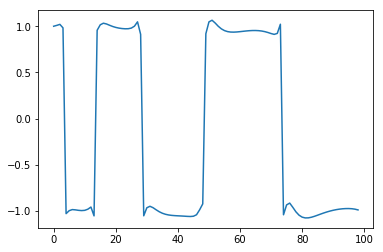

In [638]:
T = 50
initials = np.arange(1, 100, 1)
ends = []
for b in initials:
    s = calc_sol(b, T)
    ends.append(s[-1])
plt.plot(ends)

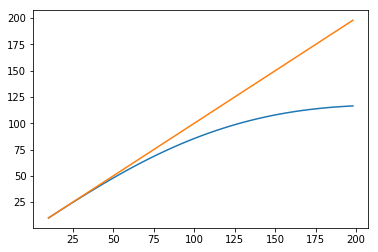

In [659]:
xs = np.arange(10, 200, 2)
ys = [eval_initial_cond(x, 0.01)[0] for x in xs]
plt.plot(xs, ys)
plt.plot(xs, xs)

In [634]:
eval_initial_cond(37, 0.01)

(36.1733689389459, -162.001041932439)

figures to make:
- time & speed of nth crossing
- time & speed at bottom vs time & speed needed for nth crossing
- animation of position with varying initial condition
- height on left side on y axis, initial height on right side on x axis